# El Sabor de los Secretos

El sol de La Habana comenzaba a pintar el cielo de tonalidades naranjas y rosas cuando Clara, una anciana y muy reconocida historiadora de arte, llegó al bullicioso Paladar Los Mercaderes. No era la primera vez que visitaba este lugar, pero hoy la ocasión era diferente. Buscaba desentrañar un misterio que había encontrado en un viejo diario que había encontrado mientras limpiaba su casa.

El diario relataba el día a día de Orlando, el abuelo de Clara, un espectacular cocinero de origen asturiano que llegó a la Habana con apenas 15 años huyendo de la Guerra del Rif. El diario mencionaba diversos locales por los que pasó Orlando, desde fondas económicas en las que trabajó durante su juventud hasta restaurantes gourmet donde ejerció como Chef Ejecutivo cuando ya era un cocinero reconocido.

Clara empezó por recorrer toda La Habana intentando recopilar algo de información que la encaminara a su abuelo, sin embargo, ella sola no pudo peinar toda la provincia y para cuando finalizó el día no tenía la menor pista que la ayudara en su búsqueda. Es por eso que Clara requirió de los estudiantes de Ciencia de Datos de la Universidad de La Habana, que generosamente se dispusieron a ayudarla.

In [12]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from methods import datastorage
from methods import district_counter
from methods import create_pd_df
from methods import create_pd_df2

data = datastorage("JsonData")
district_count = district_counter(data) 

In [13]:

print(f'''Cantidad de bares y restaurantes analizados por municipio:
      {json.dumps(district_count, indent=2).replace("{", "").replace("}", "")}''')

Cantidad de bares y restaurantes analizados por municipio:
      
  "Plaza de la Revolucion": 47,
  "Habana Vieja": 42,
  "Centro Habana": 31,
  "Playa": 30,
  "Habana del Este": 21,
  "Diez de Octubre": 15,
  "Boyeros": 15,
  "Marianao": 10,
  "Cerro": 10,
  "Guanabacoa": 10,
  "La Lisa": 10,
  "San Miguel del Padron": 10,
  "Arroyo Naranjo": 10,
  "Cotorro": 10,
  "Regla": 4,
  "Total": 275



In [14]:
df = create_pd_df(data)
df2 = create_pd_df2(df, district_count)

Los estudianets recopilaron datos de cerca de 300 restaurantes y bares, pero solo utilizaron 275 para su estudio. Los estudiantes se dieron cuenta que los locales actualmente diferian mucho en su servicio comparado a como eran descritos por Orlando. El avance tecnológico hacía que datos como la existencia de servicio de entrega a domicilio o Wi-Fi en un local fueran triviales en su búsqueda, pues en la época de Orlando estos no existían. Ni siquiera el nombre era suficiente para ayudarlos en su búsqueda, debido a que es común que un local cambie de nombre al cambiar de dueño, al tomar una nueva dirección estílistica, al ser renovado, etc.

Lo único que notaron era relativamente parecido entre la época de Orlando y ahora era la carta los restaurantes. Al parecer a lo largo de los años, esta no tendía a variar mucho, incluso si un restaurante sufría un cambio (a no ser que este fuera muy radical), el personal de cocina tendía a quedarse trabajando en el mismo local, en especial los Chefs quienes son los encargados de curar el menú y que a menudo transmiten su visión a sus sucesores cuando abandonan la labor.

[Text(0.5, 1.0, 'Distribucion de la Media del coste del plato por tipo de plato y municipio')]

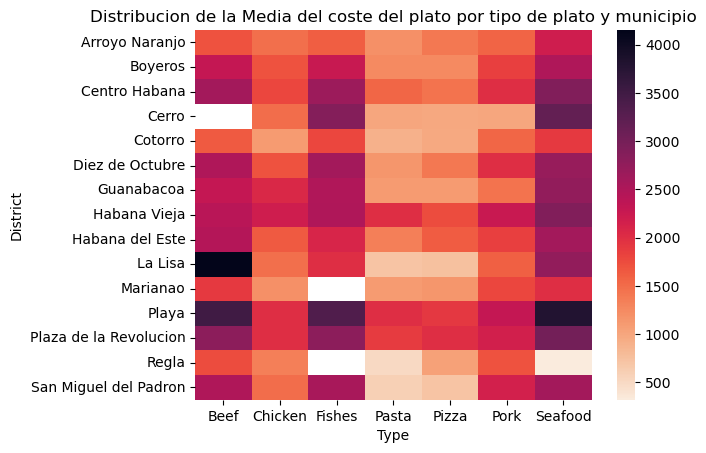

In [26]:
sns.heatmap(df2.pivot(
    index="District",
    columns="Type",
    values="Median"
    ), cmap='rocket_r').set(title='Distribucion de la media del coste del plato por tipo de plato y municipio')

[Text(0.5, 1.0, 'Distribucion de la cantidad de platos por tipo de plato y municipio')]

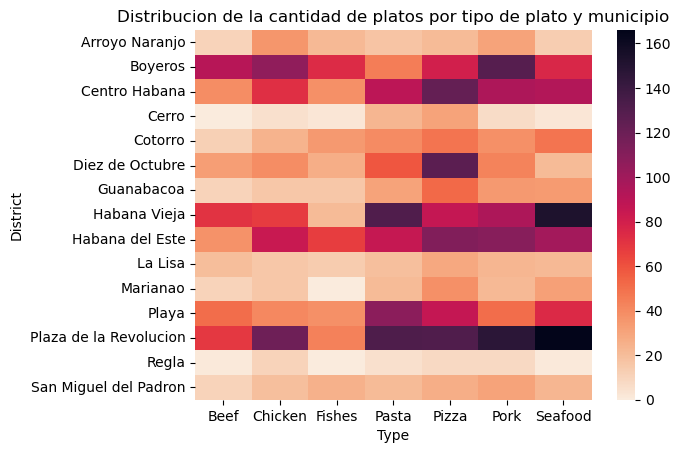

In [31]:
sns.heatmap(df2.pivot(
    index="District",
    columns="Type",
    values="Count"
    ), cmap='rocket_r').set(title='Distribucion de la cantidad de platos por tipo de plato y municipio')